In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 13.5

In [200]:
covid_base_df = pd.read_csv("covid_base.txt", sep="\t", header=None)
covid_ds_df = pd.read_csv("covid_ds.txt", sep="\t", header=None)
covid_gpu_df = pd.read_csv("covid_gpu.txt", sep="\t", header=None)

In [201]:
covid_base_df.head()

,0,1
0,0.7500,801.455314
1,0.7600,795.490382
2,0.7925,800.686952
3,0.7400,801.952887
4,0.7475,802.256305


In [202]:
base_acc_arr = np.array(covid_base_df.iloc[:, 0])
base_time_arr = np.cumsum(np.array(covid_base_df.iloc[:, 1]))/3600

gpu_acc_arr = np.array(covid_gpu_df.iloc[:, 0])
gpu_time_arr = np.cumsum(np.array(covid_gpu_df.iloc[:, 1]))/3600

ds_acc_arr = np.array(covid_ds_df.iloc[:, 0])
ds_time_arr = (np.cumsum(np.array(covid_ds_df.iloc[:, 1]))+40)/3600

In [203]:
flower_acc_df = pd.read_csv("covid_flower_acc.txt").iloc[:, 1]

flower_acc_arr = []
for i in range(len(flower_acc_df)):
    cur_val = float(flower_acc_df[i][10:])
    flower_acc_arr.append(cur_val)

flower_acc_arr = flower_acc_arr[1:]

In [204]:
flower_time_df = pd.read_csv("covid_flower_time.txt").iloc[:, 0]

flower_time_arr = []
for i in range(len(flower_time_df)):
    cur_val = float(flower_time_df[i][5:])
    flower_time_arr.append(cur_val)

for i in range(1, len(flower_time_arr)):
    flower_time_arr[i] = flower_time_arr[i] - flower_time_arr[0]

flower_time_arr = np.array(flower_time_arr)/3600
flower_time_arr = flower_time_arr[1:]

# Let's also created a fitted line
flower_model = LinearRegression().fit(np.array(flower_time_arr).reshape(-1, 1), np.array(flower_acc_arr).reshape(-1, 1))
flower_fitted = flower_model.predict(flower_time_arr.reshape(-1, 1))

In [205]:
openfl_df = pd.read_csv("covid_openfl.txt", header=None)
openfl_time_arr = np.array(openfl_df.iloc[:,0])/3600
openfl_acc_arr = np.array(openfl_df.iloc[:,1])

In [206]:
# For baseline and data station, let's plot two points

max_base_ind = np.argmax(base_acc_arr)
max_ds_ind = np.argmax(ds_acc_arr)

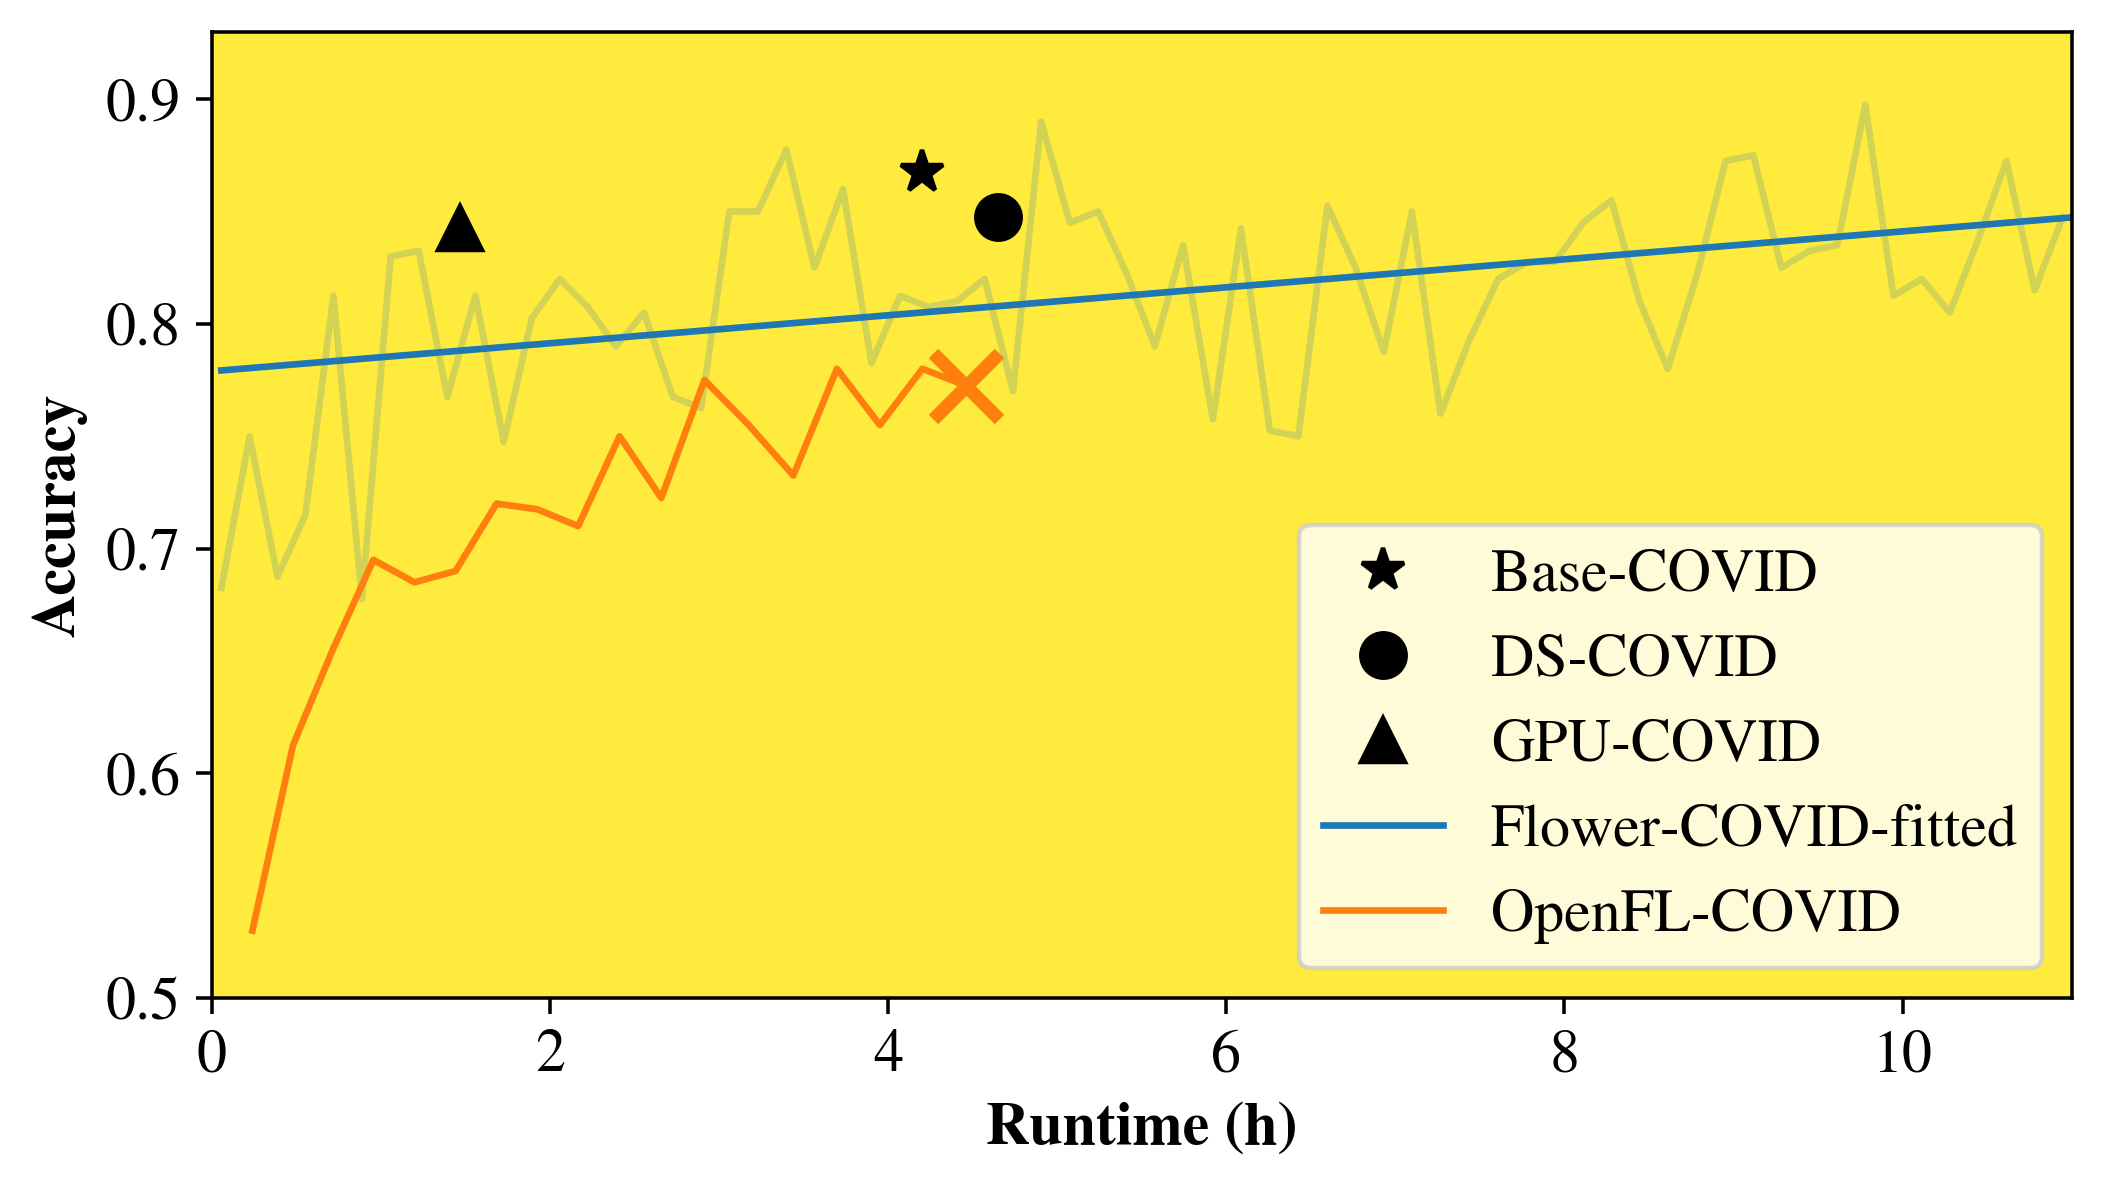

In [208]:
plt.figure(figsize=(7.5, 4), dpi=320)
ax = plt.axes()
ax.set_facecolor([255/255, 235/255, 61/255])

# We first plot the baseline.
plt.plot(base_time_arr[18],
         base_acc_arr[18],
         marker='*',
         markersize=10,
         color="k",
         linewidth=0,
         label="Base-COVID")
# We now plot data station.
plt.plot(ds_time_arr[20],
         ds_acc_arr[20],
         marker='o',
         markersize=10,
         color="k",
         linewidth=0,
         label="DS-COVID")
# We now plot GPU.
plt.plot(gpu_time_arr[25],
         gpu_acc_arr[25],
         marker='^',
         markersize=10,
         color="k",
         linewidth=0,
         label="GPU-COVID")
# Plotting flower and fitted line
plt.plot(flower_time_arr[0::3],
         flower_acc_arr[0::3],
         alpha = 0.2,
         color="#1f77b4",
         )
plt.plot(flower_time_arr,
         flower_fitted,
         label="Flower-COVID-fitted",
         color="#1f77b4",
         )
# Plotting openFL
plt.plot(openfl_time_arr,
         openfl_acc_arr,
         label="OpenFL-COVID",
         color="#ff7f0e",
         )
# Adding a cross to indicate openFL has run out of memory
plt.plot(openfl_time_arr[-1],
         openfl_acc_arr[-1],
         marker='x',
         markersize=15,
         color="#ff7f0e",
         mew=3,
         )
plt.xlim([0, 11])
plt.ylim([0.5, 0.93])
plt.xlabel("Runtime (h)", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.legend(loc=4)
plt.savefig("covid_8.pdf",
            facecolor=[255/255, 235/255, 61/255],
            bbox_inches='tight',)